# <font color="red"> Deep Learning LSTM Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("monthly_milk_production.csv")

In [3]:
df

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [4]:
df=pd.read_csv("monthly_milk_production.csv",index_col="Date",parse_dates=True)
#parse_dates: verinin içinde tarih varsa onu anlıyor

In [5]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [6]:
df.index.freq='MS'

In [7]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<AxesSubplot:xlabel='Date'>

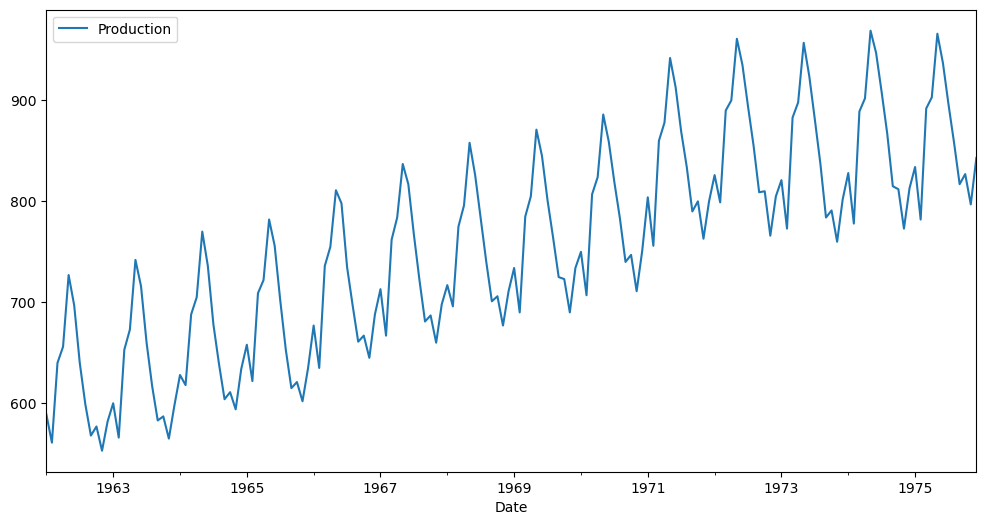

In [8]:
df.plot(figsize=(12,6))

### <font color="navy blue"> Dickey fuller test

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

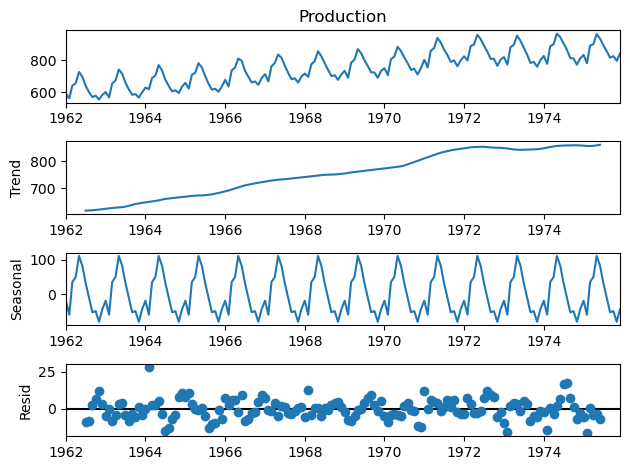

In [10]:
results =seasonal_decompose(df["Production"])
results.plot();

In [11]:
len(df)

168

In [12]:
train=df.iloc[:156]
test=df.iloc[156:] #split yapamıyoruz çünkü rastgele seçmeliyiz

In [13]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [14]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [15]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #MinMaxScaler, bütün veriyi -1 ile 1 arasına indirir 

In [17]:
scaler.fit(train)
scaled_train=scaler.transform(train) #train datasını standart hale getirdik
scaled_test=scaler.transform(test) #test datasını standart hale getirdik


In [18]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#define generator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=n_input,
                               batch_size=1)

In [21]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f"Predict this y: \n {y}")

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [22]:
X.shape

(1, 3, 1)

In [23]:
# aynı şeyi yapacağız ama 3 ay değil de 12 ayı kullanıcaz
# we do the same thing, but now instead for 12 months

In [24]:
n_input=12
generator=TimeseriesGenerator(scaled_train, scaled_train,
                             length=n_input,
                             batch_size=1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
#define model
model=Sequential()
model.add(LSTM(100, activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
#fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 5ms/step - loss: 0.0419
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0227
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0154
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0100
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0056
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0072
Epoch 7/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0043
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0041
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0033
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0039
Epoch 13/50
144/144 [====

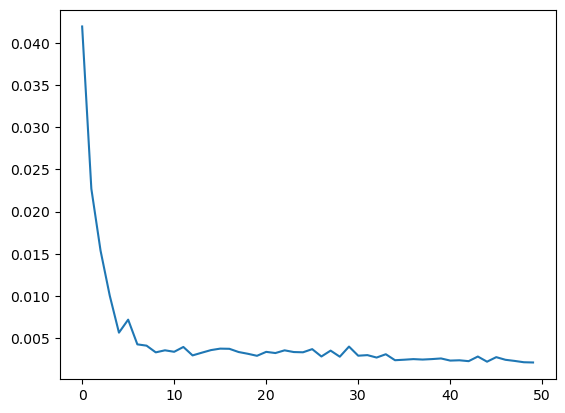

In [29]:
loss_per_epoch=model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [30]:
last_train_batch = scaled_train[-12:]

In [31]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [32]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 244ms/step


array([[0.63192666]], dtype=float32)

In [33]:
scaled_test[0]

array([0.67548077])

In [34]:
test_predictions=[]

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))


for i in range(len(test)):
    
    #get the predictiom value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    #append the prediction into the array
    test_predictions.append(current_pred)
    
    #use the prediction to update the batch and remove the first values
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [35]:
test_predictions

[array([0.63192666], dtype=float32),
 array([0.6105981], dtype=float32),
 array([0.76919997], dtype=float32),
 array([0.8331419], dtype=float32),
 array([0.91560507], dtype=float32),
 array([0.90520126], dtype=float32),
 array([0.8500964], dtype=float32),
 array([0.76981026], dtype=float32),
 array([0.66539174], dtype=float32),
 array([0.6248397], dtype=float32),
 array([0.5728533], dtype=float32),
 array([0.6108862], dtype=float32)]

In [36]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [37]:
true_predictions = scaler.inverse_transform(test_predictions)

In [38]:
true_predictions

array([[815.8814888 ],
       [807.00880432],
       [872.98718643],
       [899.58703995],
       [933.89170837],
       [929.56372261],
       [906.64010429],
       [873.24106789],
       [829.80296516],
       [812.93332481],
       [791.30698395],
       [807.12866592]])

In [39]:
test["Predictions"]=true_predictions

C:\Users\huawei\AppData\Local\Temp\ipykernel_1396\4106173052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"]=true_predictions


<AxesSubplot:xlabel='Date'>

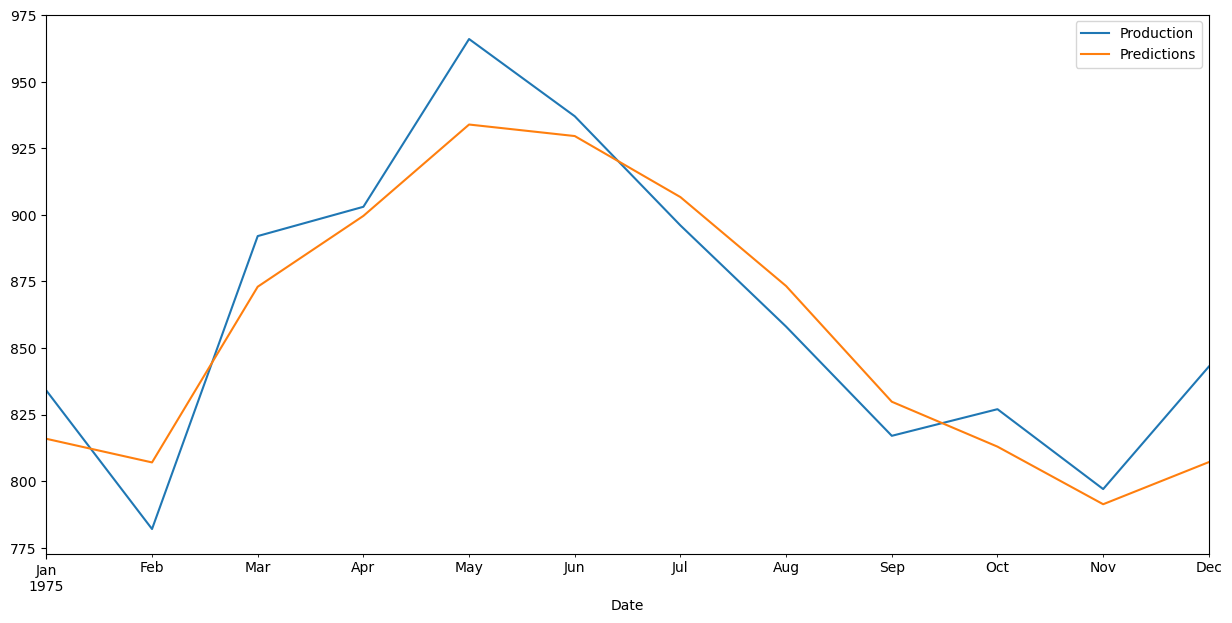

In [40]:
test.plot(figsize=(15,7))

In [41]:
#truncu olan tahmin,mavi olan gerçek değer

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt



In [43]:
rmse = sqrt(mean_squared_error(test["Production"],test["Predictions"]))
print(rmse)

19.23440712191258


In [44]:
#rmse=root mean squared error